In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [119]:
df = pd.read_csv("D:/Data Analysis/Files/car_prices.csv")

In [120]:
# Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [121]:
# Check first rows to understand values
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


# Descriptive Statistics & Distribution

## Cleaning Phase 

In [122]:
# Checking NaNs of 'saledate' column
df[df["saledate"].isna()][["saledate"]].head()

,saledate
306447,NaN
406524,NaN
422358,NaN
429644,NaN
429660,NaN


In [123]:
# Double-checking values with 'saledate' NaN 
df.loc[[306447,406524,422358,429644,429660]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306447,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaN
406524,2013,Chrysler,300,Base,Sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaN
422358,2013,Hyundai,Sonata,GLS,Sedan,NaN,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaN
429644,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaN
429660,2013,Dodge,Avenger,SXT,Sedan,automatic,1c3cdzcg5dn741076,il,34.0,44525.0,gray,black,kfl llc,NaN,NaN,NaN


In [124]:
# Dropping NaN values in Saledate before the stripping so we understand can find remaining corrupted data
df['saledate'] = df['saledate'].dropna()
# Stripping into two parts, on GMT. What we are doing is that we are converting each value into string (astype(str))
# then with .str we apply the following function to each element (split('GMT')) then again str[0] to take 0 indexed element and then again str.strip() for each element
# split() function separates string values into list on separator which is inside parantheses
df['saledate'] = df['saledate'].astype(str).str.split('GMT').str[0].str.strip()
# We now are converting above strings into datetime values, in case we have errors, we are nulling them
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
# Checking the datatype
print("Column Type:", df['saledate'].dtype)

Column Type: datetime64[ns]


In [125]:
# Checking which rows got errors
df[df['saledate'].isnull()]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
306447,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac6dh687932,il,19.0,37254.0,gray,gray,kfl llc,NaN,NaN,NaT
406524,2013,Chrysler,300,Base,Sedan,automatic,2c3ccaag9dh723146,il,27.0,44208.0,silver,black,kfl llc,NaN,NaN,NaT
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,NaT
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,NaT
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,NaT
422358,2013,Hyundai,Sonata,GLS,Sedan,NaN,5npeb4ac3dh735368,az,28.0,44299.0,blue,gray,kfl llc,NaN,NaN,NaT
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,NaT
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,NaT
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,NaT
429644,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb9dn718531,il,25.0,47344.0,white,black,kfl llc,NaN,NaN,NaT


In [126]:
# Dropping NaNs and NaTs
df = df.dropna(subset=['saledate', 'make', 'model', 'body'])

In [127]:
# Filling necessary columns with "Unknown" instead of NaN
columns = ['transmission', 'color', 'interior']
for column in columns:
    df[column] = df[column].fillna("Unknown")

In [128]:
# Filling remaining necessary columns with 0 to avoid errors in visualization later
columns = ['odometer', 'condition']
for column in columns:
    df[column] = df[column].fillna(0)

In [129]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [130]:
df['sale_year'] = df['saledate'].dt.year

In [131]:
df.describe()

,year,condition,odometer,mmr,sellingprice,saledate,sale_year
count,545506.000000,545506.000000,545506.000000,545506.000000,545506.000000,545506,545506.000000
mean,2010.141161,30.170812,67246.856731,13884.253335,13724.174150,2015-03-06 11:38:23.263575808,2014.904661
min,1990.000000,0.000000,0.000000,25.000000,1.000000,2014-01-01 09:15:00,2014.000000
25%,2008.000000,23.000000,28046.000000,7325.000000,7100.000000,2015-01-21 02:15:00,2015.000000
50%,2012.000000,34.000000,51123.000000,12350.000000,12250.000000,2015-02-13 04:00:00,2015.000000
75%,2013.000000,41.000000,97499.000000,18400.000000,18300.000000,2015-05-22 02:00:00,2015.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015-07-21 02:30:00,2015.000000
std,3.887321,13.934176,52715.744862,9626.936591,9698.552325,NaN,0.293683


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545506 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          545506 non-null  int64         
 1   make          545506 non-null  object        
 2   model         545506 non-null  object        
 3   trim          545506 non-null  object        
 4   body          545506 non-null  object        
 5   transmission  545506 non-null  object        
 6   vin           545506 non-null  object        
 7   state         545506 non-null  object        
 8   condition     545506 non-null  float64       
 9   odometer      545506 non-null  float64       
 10  color         545506 non-null  object        
 11  interior      545506 non-null  object        
 12  seller        545506 non-null  object        
 13  mmr           545506 non-null  float64       
 14  sellingprice  545506 non-null  float64       
 15  saledate      545506 n

## Analyzing

### The most sold

In [133]:
the_most_sold = df.groupby('make')['model'].count()
display(the_most_sold)

make
Acura             5901
Aston Martin        25
Audi              5857
BMW              20633
Bentley            116
Buick             5107
Cadillac          7519
Chevrolet        60179
Chrysler         17274
Daewoo               3
Dodge            30708
FIAT               865
Ferrari             19
Fisker               9
Ford             93553
GMC              10613
Geo                 19
HUMMER             805
Honda            27203
Hyundai          21811
Infiniti         15305
Isuzu              204
Jaguar            1420
Jeep             15372
Kia              18075
Lamborghini          4
Land Rover        1735
Lexus            11861
Lincoln           5757
Lotus                1
MINI              3224
Maserati           133
Mazda             8362
Mercedes-Benz    17141
Mercury           1992
Mitsubishi        4140
Nissan           53946
Oldsmobile         364
Plymouth            20
Pontiac           4497
Porsche           1383
Ram               4574
Rolls-Royce         17
Saab  

### Selling Price Distribution

In [134]:
df['sellingprice'].sort_values(ascending=False)

344905    230000.0
548169    183000.0
446949    173000.0
545523    171500.0
125095    169500.0
            ...   
281158       100.0
48453          1.0
293223         1.0
7566           1.0
348252         1.0
Name: sellingprice, Length: 545506, dtype: float64

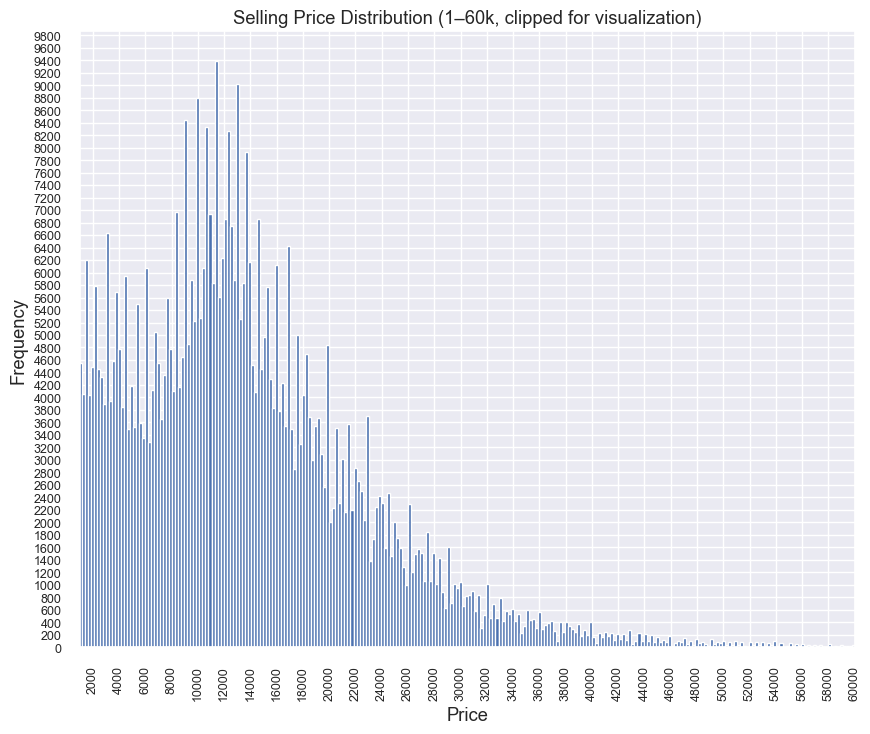

In [135]:
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(df['sellingprice'], bins=1000)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution (1–60k, clipped for visualization)")
plt.yticks(size=9)
plt.xticks(size=9, rotation=90) 
ax.set_xlim(1000,60000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))


### Top Brands

In [136]:
top_10_brands = the_most_sold.sort_values(ascending=False).head(10)

In [137]:
display(top_10_brands)

make
Ford         93553
Chevrolet    60179
Nissan       53946
Toyota       39871
Dodge        30708
Honda        27203
Hyundai      21811
BMW          20633
Kia          18075
Chrysler     17274
Name: model, dtype: int64

### Body normalization

In [138]:
print(len(df["body"].unique()))

86


In [139]:
unique_body = df['body'].nunique()
unique_body

86

In [140]:
RULES = [
    ("convertible", "convertible"),
    ("coupe", "coupe"),
    ("koup", "coupe"),
    ("wagon", "wagon"),
    ("hatchback", "hatchback"),
    ("van", "van"),
    ("supercrew", "van"),
    ("cab", "truck"),
    ("suv", "suv"),
    ("sedan", "sedan"),
]

def classify(body):
    for keyword, category in RULES:
        if keyword in body.lower():
            return category
    return body.lower()

In [141]:
df["body_type"] = df["body"].apply(classify)
df["body_type"].head()

0      suv
1      suv
2    sedan
3    sedan
4    sedan
Name: body_type, dtype: object

In [142]:
count_bodies = df.groupby('body_type').size()
display(count_bodies)

body_type
convertible     10933
coupe           20163
hatchback       26237
sedan          248651
suv            143844
truck           38507
van             40992
wagon           16179
dtype: int64

In [143]:
bodies = df['body'].unique()

for a in bodies:
    print(a)

SUV
Sedan
Convertible
Coupe
Wagon
Hatchback
Crew Cab
G Coupe
G Sedan
Elantra Coupe
Genesis Coupe
Minivan
Van
Double Cab
CrewMax Cab
Access Cab
King Cab
SuperCrew
CTS Coupe
Extended Cab
E-Series Van
SuperCab
Regular Cab
G Convertible
Koup
Quad Cab
CTS-V Coupe
sedan
G37 Convertible
Club Cab
Xtracab
Q60 Convertible
CTS Wagon
convertible
G37 Coupe
Mega Cab
Cab Plus 4
Q60 Coupe
Cab Plus
Beetle Convertible
TSX Sport Wagon
Promaster Cargo Van
GranTurismo Convertible
CTS-V Wagon
Ram Van
minivan
suv
Transit Van
van
regular-cab
g sedan
g coupe
hatchback
king cab
supercrew
g convertible
coupe
crew cab
wagon
double cab
e-series van
regular cab
quad cab
g37 convertible
supercab
extended cab
crewmax cab
genesis coupe
access cab
mega cab
xtracab
beetle convertible
cts coupe
koup
club cab
elantra coupe
q60 coupe
cts-v coupe
transit van
granturismo convertible
tsx sport wagon
promaster cargo van
q60 convertible
g37 coupe
cab plus 4
cts wagon


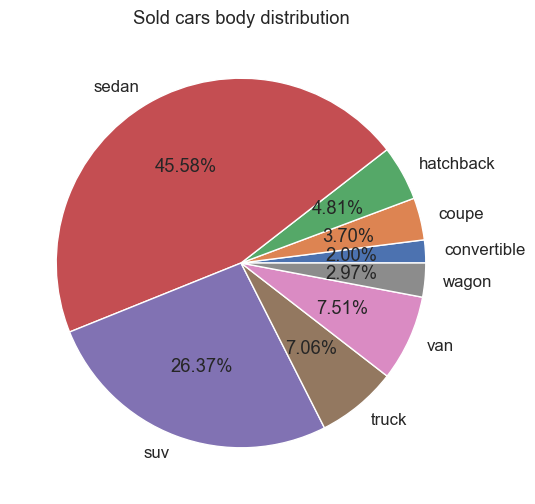

In [144]:
fig, ax = plt.subplots(figsize=(10,6))

ax.pie(count_bodies, labels= count_bodies.index, autopct='%1.2f%%')
plt.title("Sold cars body distribution")

plt.show()

### Summary by Brand

In [145]:
summary = df.groupby("make").agg({'sellingprice':["min", "max", "mean","count"]})
display(summary)

sellingprice                                
                       min       max           mean  count
make                                                      
Acura                200.0   47800.0   14017.268260   5901
Aston Martin       38300.0  103000.0   54812.000000     25
Audi                 150.0  120000.0   19901.310398   5857
BMW                  100.0  165000.0   21234.340038  20633
Bentley            22700.0  163000.0   74367.672414    116
Buick                100.0   41000.0   10721.764245   5107
Cadillac             150.0   83000.0   15221.155872   7519
Chevrolet            100.0   88250.0   11978.675269  60179
Chrysler             100.0   41000.0   11167.249392  17274
Daewoo               300.0     600.0     400.000000      3
Dodge                100.0   51700.0   11206.802592  30708
FIAT                2000.0   22500.0   10367.487861    865
Ferrari            81000.0  183000.0  127210.526316     19
Fisker             37000.0   54500.0   46461.111111      9
Ford                   1.0  230000.0   14540.469648  93553
GMC                  200.0   66000.0   16951.410534  10613
Geo                  150.0    1600.0     528.947368     19
HUMMER              3600.0   50000.0   15269.488199    805
Honda                200.0   37000.0   10941.238430  27203
Hyundai              100.0   55000.0   11010.631608  21811
Infiniti             200.0   75000.0   20417.457694  15305
Isuzu                  1.0    7900.0    1709.196078    204
Jaguar               250.0   95250.0   19782.518310   1420
Jeep                 200.0   61000.0   15000.244145  15372
Kia                  150.0   42750.0   11808.672918  18075
Lamborghini       107000.0  117500.0  112625.000000      4
Land Rover           200.0  135000.0   33097.855908   1735
Lexus                200.0   81000.0   20286.236827  11861
Lincoln              200.0   59000.0   16824.676915   5757
Lotus              40800.0   40800.0   40800.000000      1
MINI                1100.0   34750.0   12313.663151   3224
Maserati            1200.0   95000.0   45320.300752    133
Mazda                200.0   35000.0   10155.641234   8362
Mercedes-Benz          1.0  173000.0   21590.566828  17141
Mercury              100.0   18300.0    3935.567269   1992
Mitsubishi           100.0   34400.0    8201.565942   4140
Nissan               100.0   86400.0   11739.015960  53946
Oldsmobile           200.0    5000.0     954.189560    364
Plymouth             300.0   26500.0    9592.500000     20
Pontiac              100.0   30000.0    3755.342673   4497
Porsche             1250.0  157000.0   39965.329718   1383
Ram                 3000.0   54000.0   25299.936817   4574
Rolls-Royce       140000.0  171500.0  153488.235294     17
Saab                 200.0   17750.0    3628.099174    484
Saturn               150.0   15050.0    3385.427666   2841
Scion                800.0   24100.0    9578.808536   1687
Subaru               250.0   37600.0   15383.107476   5043
Suzuki               200.0   14900.0    3903.140727   1073
Tesla              49250.0   85750.0   67054.347826     23
Toyota               150.0   68900.0   12249.321813  39871
Volkswagen           200.0   42800.0    9374.837435  12555
Volvo                200.0   34700.0   11463.952482   3788
smart               1600.0   11000.0    6247.594937    395

# Relationships & Correlations

## Mileage vs Price

In [146]:
top_distance = df["odometer"].sort_values(ascending=False).head(10)

In [147]:
top_distance

84086     999999.0
81661     999999.0
83882     999999.0
406428    999999.0
490461    999999.0
20838     999999.0
417516    999999.0
57588     999999.0
38465     999999.0
55492     999999.0
Name: odometer, dtype: float64

C:\Users\Xudoyor\AppData\Local\Temp\ipykernel_1144\1222262679.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df["odometer"], df["sellingprice"], cmap = "Blues", s=3)


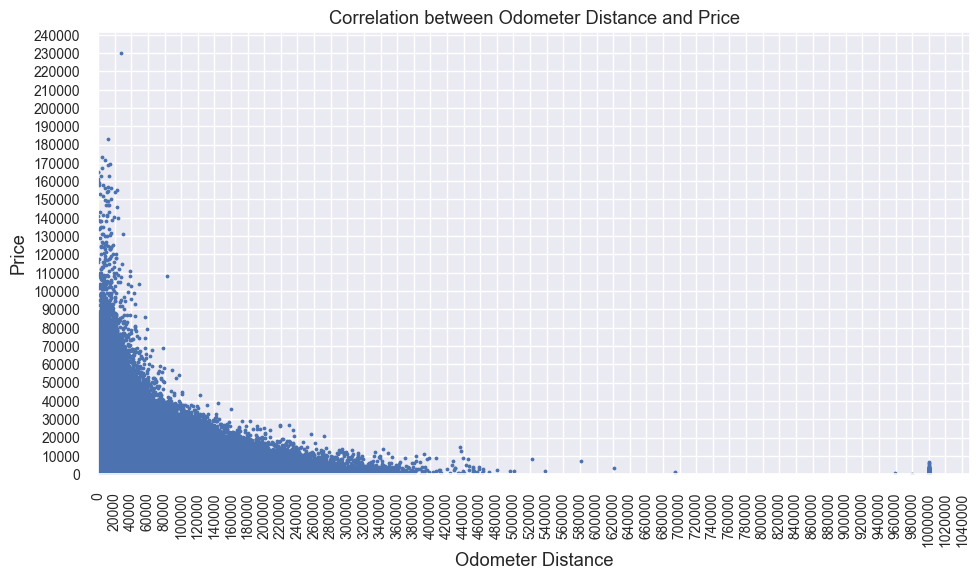

In [148]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df["odometer"], df["sellingprice"], cmap = "Blues", s=3)
ax.set_title("Correlation between Odometer Distance and Price")
ax.set_xlabel("Odometer Distance")
ax.set_ylabel("Price")
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.tick_params(labelsize=10)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.ticklabel_format(style="plain")
plt.xticks(rotation=90, size = 10)
plt.tight_layout()
plt.show()

## Condition Impact

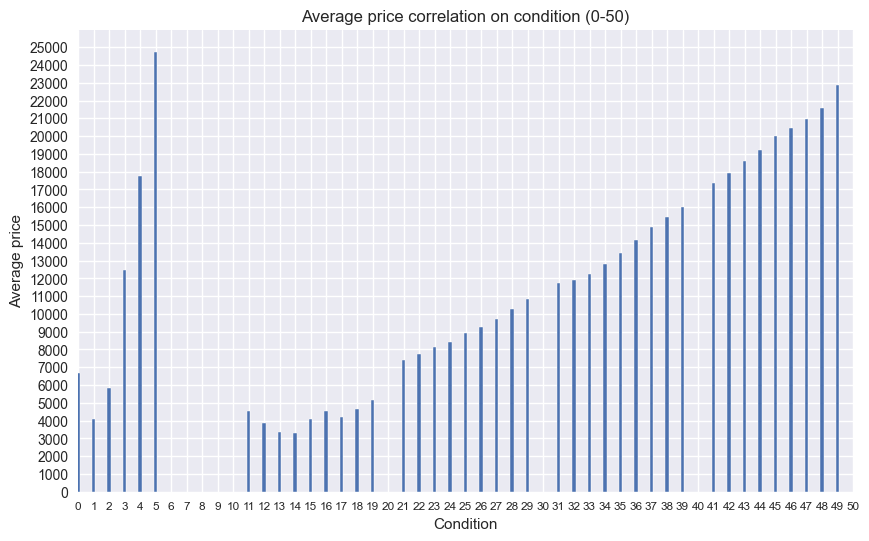

In [149]:
condition_impact = df.groupby("condition")["sellingprice"].mean()
plt.style.use("seaborn-v0_8")

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(condition_impact.index, condition_impact.values, width=0.25, label="Price Bars")
ax.set_title("Average price correlation on condition (0-50)")
ax.set_xlabel("Condition")
ax.set_ylabel("Average price")
plt.grid(True)
plt.xlim(0,50)
plt.xticks(size=8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))


## Depreciation Curve

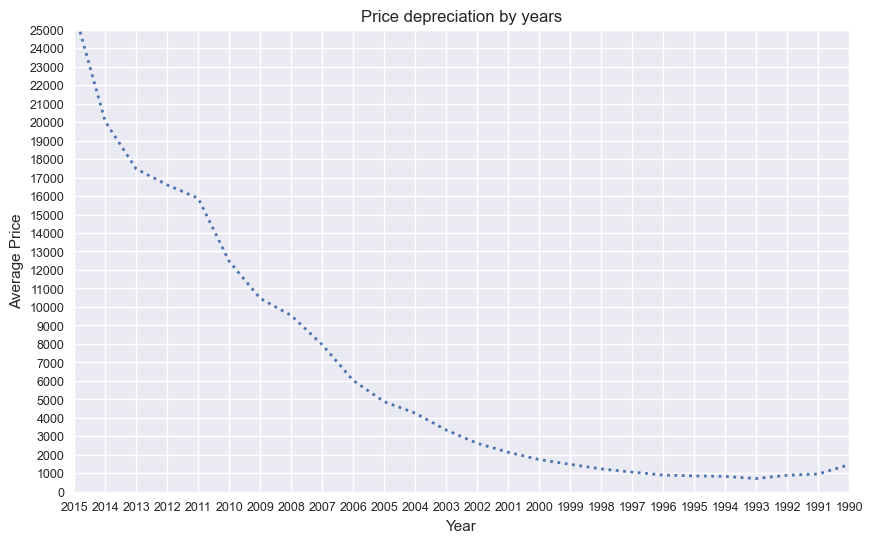

In [150]:
yearly_depreciation = df.groupby("year")["sellingprice"].mean().sort_index(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(yearly_depreciation.index, yearly_depreciation.values, linestyle=':', linewidth=2)
plt.xlim(1990,2015)
plt.ylim(0,25000)
ax.set_title("Price depreciation by years")
ax.set_xlabel("Year")
ax.set_ylabel("Average Price")
ax.tick_params(labelsize=9)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.invert_xaxis()


# The "MMR" Analysis (Business Logic)

### The "Delta" Column and Share Analysis

In [151]:
df["diff_mmr"] = df["sellingprice"] - df["mmr"]
above_mmr = (df["diff_mmr"] > 0).sum()
at_mmr = (df["diff_mmr"] == 0).sum()
below_mmr = (df["diff_mmr"] < 0).sum()
values = [above_mmr, at_mmr, below_mmr]
df["diff_mmr"].sum()

np.float64(-87324156.0)

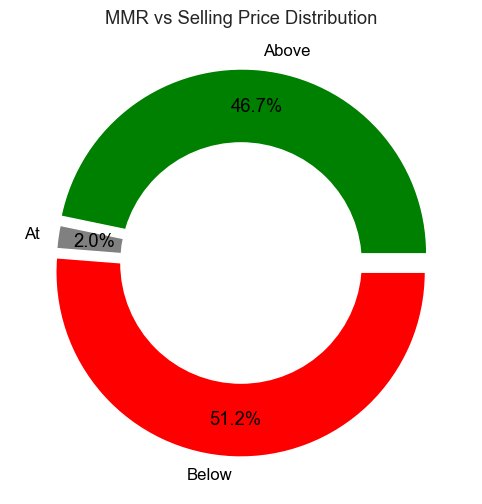

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor("White")
sns.set(font_scale=1.1)

ax.pie(values, 
       labels=["Above", "At", "Below"], 
       autopct='%1.1f%%', 
       explode=[0.05,0,0.05], 
       colors = ["green", "grey", "red"], 
       textprops={"color" : "black"}, 
       pctdistance=0.8)
plt.title("MMR vs Selling Price Distribution")

### Add a hole in the pie  
# Hole - a white-colored circle of radius 0.65

hole = plt.Circle((0, 0), 0.65, facecolor='white')
 
# Current Figure ( plt.gcf() ) 
# --> Current Axis ( gca() ) 
# --> add the hole 
plt.gcf().gca().add_artist(hole)

plt.show()

In [153]:
top_cars_by_mmr = df.groupby("make")["diff_mmr"].agg(["sum", "count", "mean"]).sort_values("sum", ascending=False)

display(top_cars_by_mmr)

,sum,count,mean
make,,,
HUMMER,203363.0,805,252.624845
Aston Martin,31300.0,25,1252.000000
Suzuki,16345.0,1073,15.232992
Lamborghini,4500.0,4,1125.000000
Lotus,500.0,1,500.000000
Daewoo,-700.0,3,-233.333333
Geo,-1525.0,19,-80.263158
Isuzu,-8499.0,204,-41.661765
Rolls-Royce,-13700.0,17,-805.882353


In [154]:
top_bodies_by_mmr = df.groupby("body_type")["diff_mmr"].agg(["sum", "count", "mean"]).sort_values("sum", ascending=False)
display(top_bodies_by_mmr)

,sum,count,mean
body_type,,,
convertible,-1784024.0,10933,-163.177902
wagon,-1971984.0,16179,-121.885407
coupe,-2320585.0,20163,-115.091256
hatchback,-4104490.0,26237,-156.438998
truck,-5664829.0,38507,-147.111668
van,-6257489.0,40992,-152.651469
suv,-21614181.0,143844,-150.261262
sedan,-43606574.0,248651,-175.372607


## Best Deals

In [155]:
best_deals = df["diff_mmr"].sort_values(ascending=False).head(5)
display(best_deals.index)

df.loc[[344905, 160201, 407508, 405315, 336652]]

Index([344905, 160201, 407508, 405315, 336652], dtype='int64')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,body_type,diff_mmr
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,2015-02-25 02:00:00,2015,suv,207200.0
160201,2010,Ford,Escape,XLT,SUV,automatic,1fmcu0d77aka54695,oh,37.0,82985.0,red,gray,pat obrien chevrolet south,8250.0,108200.0,2015-01-20 01:30:00,2015,suv,99950.0
407508,2012,Nissan,Versa,1.8 S,Hatchback,automatic,3n1bc1cp2ck235725,fl,38.0,10926.0,white,black,nissan-infiniti lt,10350.0,67500.0,2015-04-16 02:15:00,2015,hatchback,57150.0
405315,2015,Toyota,Corolla,LE,Sedan,automatic,2t1burhe2fc353484,nj,22.0,517.0,silver,gray,enterprise veh exchange/rental,15250.0,68900.0,2015-03-18 02:30:00,2015,sedan,53650.0
336652,2013,Mercedes-Benz,Sprinter,2500 170 WB Cargo,Van,automatic,wd3pe8cc5d5801059,nv,5.0,1575.0,black,—,mbz 4 less,31900.0,84000.0,2015-02-19 14:30:00,2015,van,52100.0


## Seller Performance

In [171]:
top_sellers = df.groupby("seller")["diff_mmr"].mean().sort_values(ascending=False).head(5)
worst_sellers = df.groupby("seller")["diff_mmr"].agg(["mean", "count"]).sort_values(["count", "mean"], 
                                                                                    ascending=[0, 1]).head(5)
display(top_sellers)
display(worst_sellers)

seller
pure pursuit automotive           18600.0
auto world sales & service llc    16900.0
the car store inc                 11000.0
continental auto group            10550.0
malfara's automotive              10200.0
Name: diff_mmr, dtype: float64

,mean,count
seller,,
nissan-infiniti lt,70.225969,19693
ford motor credit company llc,-216.566533,19141
the hertz corporation,-190.270686,18261
santander consumer,-380.569396,14972
avis corporation,21.676907,12532
